# Improting required Libraries 

In [32]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Train dataset 

In [2]:
data1 = pd.read_csv('train_data.csv')
data1.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
data1.shape

(54214, 4)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [5]:
data1.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [6]:
data1.columns

Index(['ID', 'Title', 'Genre', 'Description'], dtype='object')

## Checking Missing data 

In [7]:
data1.isnull().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

## Duplicate Values 

In [8]:
data1.duplicated().sum()

0

### ~ The data is  clean we can move ahead without any preprocessing for now 

# Loading the test data 

In [9]:
data2 = pd.read_csv('test_data.csv')
data2.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [11]:
data2.describe()

,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [12]:
data2.columns

Index(['ID', 'Title', 'Description'], dtype='object')

# Checking Null and Duplicated Values 

In [13]:
data2.isnull().sum()

ID             0
Title          0
Description    0
dtype: int64

In [14]:
data2.duplicated().sum()

0

### ~ Test data is also clean and doesn't require any preprocessing 

# Merging the two datasets  

In [15]:
data_combined = pd.concat([data1, data2], ignore_index=True)
data_combined = data_combined.dropna(subset=['Genre', 'Description'])

In [16]:
data_combined.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [17]:
data_combined

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [18]:
data_combined.isnull().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

## Preapring the Labels 

In [20]:
X = data_combined['Description']
y = data_combined['Genre']

## Splitting the data 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_test.shape

(16265,)

In [23]:
X_train.shape

(37949,)

In [24]:
y_train.shape

(37949,)

In [25]:
y_test.shape

(16265,)

# Building the TF-IDF and  Naive Bayes pipeline 
- Combines vectorization and classification into a single object (model), making it easy to manage. 

In [27]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [28]:
# Trainig the model

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [30]:
# Make predictions
print("Making predictions...")
y_pred = model.predict(X_test)
print("Predictions completed.")

Making predictions...
Predictions completed.


# Evaluating the Model 

In [34]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred ,zero_division=1)

In [35]:
print("\nClassification Report:")
print(report)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
               precision    recall  f1-score   support

      action        1.00      0.00      0.00       398
       adult        1.00      0.00      0.00       156
   adventure        1.00      0.00      0.00       220
   animation        1.00      0.00      0.00       146
   biography        1.00      0.00      0.00        88
      comedy        0.65      0.03      0.05      2215
       crime        1.00      0.00      0.00       164
 documentary        0.54      0.90      0.67      3942
       drama        0.38      0.89      0.53      4076
      family        1.00      0.00      0.00       218
     fantasy        1.00      0.00      0.00       103
   game-show        1.00      0.00      0.00        55
     history        1.00      0.00      0.00        73
      horror        1.00      0.00      0.00       626
       music        1.00      0.00      0.00       217
     musical        1.00      0.00      0.00        77
     mystery        1.00      0.00      

# Text Preprocessing 

In [37]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
import re

In [41]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anamikasaroha/nltk_data...


True

In [42]:
# Lemmatizer
lemmatizer = WordNetLemmatizer()

In [43]:
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    # Lemmatize and remove stopwords
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

In [44]:
data_combined['Description'] = data_combined['Description'].apply(preprocess_text)

# Checking Imbalance Data 

In [47]:
# Checking the distribution of genres
genre_counts = data_combined['Genre'].value_counts()

# Displaying  the count of each genre
print(genre_counts)

# Identifying  the minority genres (those with the least occurrences)
minority_genres = genre_counts[genre_counts == genre_counts.min()]
print("\nMinority Genres:")
print(minority_genres)


Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

Minority Genres:
Genre
 war     132
Name: count, dtype: int64


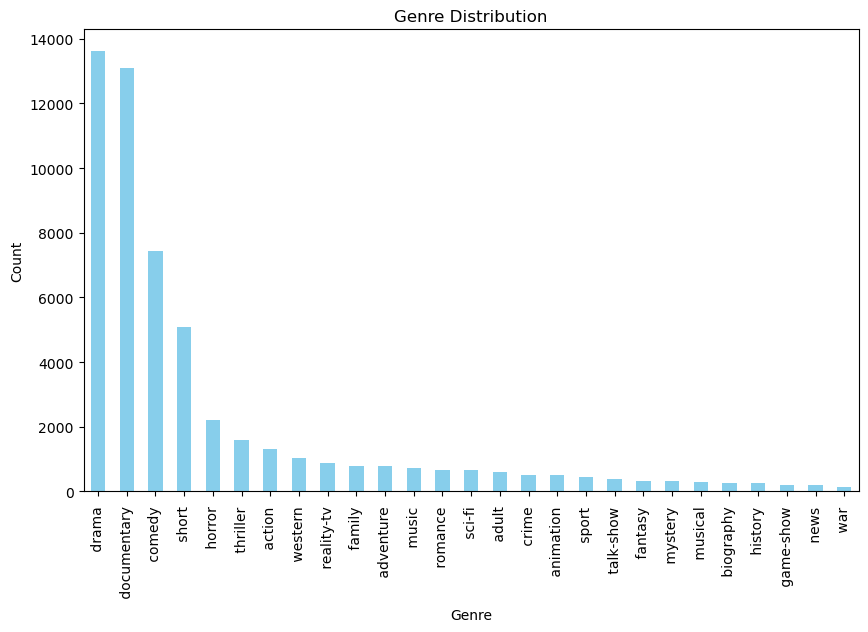

In [49]:
import matplotlib.pyplot as plt

# Plot the genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [50]:
from imblearn.over_sampling import SMOTE

In [52]:
vectorizer = TfidfVectorizer()

In [53]:
# We will apply SMOTE to balance the dataset (oversample minority classes)
# First, we need to fit and transform the text data before applying SMOTE
X_train_tfidf = vectorizer.fit_transform(X_train)

In [55]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [61]:
# Check the shape of resampled data
print(f"Resampled X shape: {X_resampled.shape}")
print(f"Resampled y shape: {y_resampled.shape}")

Resampled X shape: (257499, 99489)
Resampled y shape: (257499,)


In [56]:
model = MultinomialNB()

## Train the model 

In [57]:
model.fit(X_resampled, y_resampled)

MultinomialNB()

In [58]:
# Transforming the test data and making predictions

X_test_tfidf = vectorizer.transform(X_test)
y_pred = model.predict(X_test_tfidf)

In [62]:
# Check if predictions are made
print(f"Predictions: {y_pred[:10]}")  # Print first 10 predictions for inspection


Predictions: [' thriller ' ' drama ' ' adventure ' ' horror ' ' music ' ' documentary '
 ' documentary ' ' horror ' ' documentary ' ' horror ']


In [60]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 49.72%
               precision    recall  f1-score   support

      action        0.34      0.49      0.40       398
       adult        0.48      0.66      0.56       156
   adventure        0.29      0.27      0.28       220
   animation        0.29      0.21      0.24       146
   biography        0.04      0.06      0.05        88
      comedy        0.60      0.46      0.52      2215
       crime        0.15      0.20      0.17       164
 documentary        0.74      0.67      0.71      3942
       drama        0.68      0.42      0.52      4076
      family        0.19      0.28      0.23       218
     fantasy        0.26      0.18      0.21       103
   game-show        0.67      0.69      0.68        55
     history        0.09      0.12      0.10        73
      horror        0.47      0.77      0.58       626
       music        0.37      0.77      0.50       217
     musical        0.14      0.14      0.14        77
     mystery        0.10      0.13      0.11   